#Text Classification Using Naive Bayes and Sentiment Analysis on Blog Posts

#Objective

The main objective of this project was to build a robust text classification model using Naive Bayes and to perform sentiment analysis on blog posts. Specifically, the aim was to preprocess the raw text data, extract features using TF-IDF, train and evaluate a Naive Bayes classifier for classification accuracy, and then analyze the sentiment polarity of the text to identify trends across different categories.

##1. Data Exploration and Preprocessing

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download stopwords if not already
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Cell 2: Load dataset and basic EDA
df = pd.read_csv('blogs.csv')

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nMissing values per column:\n", df.isnull().sum())
print("\nSample rows:")
display(df.head(6))

print("\nCategory distribution (counts):")
print(df['Labels'].value_counts().sort_index())


Shape: (2000, 2)
Columns: ['Data', 'Labels']

Missing values per column:
 Data      0
Labels    0
dtype: int64

Sample rows:


,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
5,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,alt.atheism



Category distribution (counts):
Labels
alt.atheism                 100
comp.graphics               100
comp.os.ms-windows.misc     100
comp.sys.ibm.pc.hardware    100
comp.sys.mac.hardware       100
comp.windows.x              100
misc.forsale                100
rec.autos                   100
rec.motorcycles             100
rec.sport.baseball          100
rec.sport.hockey            100
sci.crypt                   100
sci.electronics             100
sci.med                     100
sci.space                   100
soc.religion.christian      100
talk.politics.guns          100
talk.politics.mideast       100
talk.politics.misc          100
talk.religion.misc          100
Name: count, dtype: int64



Category distribution:
 Labels
alt.atheism                 100
comp.graphics               100
comp.os.ms-windows.misc     100
comp.sys.ibm.pc.hardware    100
comp.sys.mac.hardware       100
comp.windows.x              100
misc.forsale                100
rec.autos                   100
rec.motorcycles             100
rec.sport.baseball          100
rec.sport.hockey            100
sci.crypt                   100
sci.electronics             100
sci.med                     100
sci.space                   100
soc.religion.christian      100
talk.politics.guns          100
talk.politics.mideast       100
talk.politics.misc          100
talk.religion.misc          100
Name: count, dtype: int64


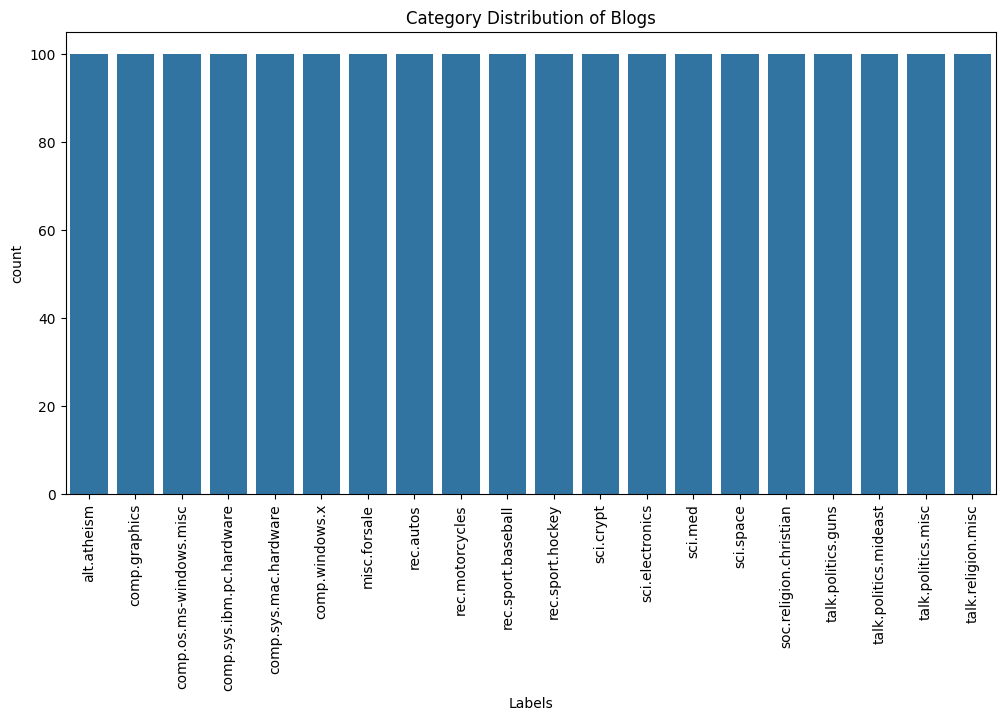

In [ ]:
# Check category distribution
print("\nCategory distribution:\n", df['Labels'].value_counts())

# Plot category distribution
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Labels', order=df['Labels'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Category Distribution of Blogs")
plt.show()


In [ ]:
# Define stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()                                # convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)               # remove punctuation/numbers
    tokens = text.split()                              # tokenization
    tokens = [word for word in tokens if word not in stop_words]  # remove stopwords
    return " ".join(tokens)

In [ ]:
# Apply cleaning
df['clean_text'] = df['Data'].apply(clean_text)

In [ ]:
# Add word count column for exploration
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))

We preprocess the blog text by converting to lowercase, removing punctuation and numbers, tokenizing into words, and removing stopwords. We also add a word count column to see text length variations.

In [ ]:
# Show preview
print("\nCleaned text preview:")
print(df[['Data', 'clean_text', 'Labels']].head(3))

print("\nWord count statistics:")
print(df['word_count'].describe())



Cleaned text preview:
                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   

                                          clean_text       Labels  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  alt.atheism  
1  newsgroups altatheism path cantaloupesrvcscmue...  alt.atheism  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  alt.atheism  

Word count statistics:
count    2000.000000
mean      173.212000
std       291.087566
min        24.000000
25%        77.000000
50%       112.000000
75%       176.000000
max      5170.000000
Name: word_count, dtype: float64


Since machine learning models cannot directly work with raw text, we use TF-IDF (Term Frequency - Inverse Document Frequency) to convert text into numeric vectors. We limit to 5000 features for efficiency. The resulting matrix will be used for Naive Bayes classification in the next task.

In [ ]:
# Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)   # keep top 5000 features
X = vectorizer.fit_transform(df['clean_text'])
y = df['Labels']

print("Shape of TF-IDF matrix:", X.shape)


Shape of TF-IDF matrix: (2000, 5000)


We split the dataset into training and test sets to evaluate model performance. Stratifying ensures the category distribution is maintained in both sets.

In [ ]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])


Train size: 1600 Test size: 400


##2. Naive Bayes Model for Text Classification

The dataset was split 80-20 into training and testing sets. The Multinomial Naive Bayes classifier achieved an overall accuracy of 85.25%. Categories with distinct terminology (e.g., rec.sport.hockey, sci.space) had perfect or near-perfect classification, while categories with overlapping vocabulary (e.g., comp.sys.ibm.pc.hardware) had slightly lower precision.

In [ ]:
# Initialize Naive Bayes classifier
nb_model = MultinomialNB()

# Train the model on training data
nb_model.fit(X_train, y_train)

# Make predictions on test set
y_pred = nb_model.predict(X_test)


Estimated Accuracy: 0.8525

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.84      0.80      0.82        20
           comp.graphics       0.89      0.85      0.87        20
 comp.os.ms-windows.misc       0.84      0.80      0.82        20
comp.sys.ibm.pc.hardware       0.58      0.75      0.65        20
   comp.sys.mac.hardware       0.88      0.75      0.81        20
          comp.windows.x       0.84      0.80      0.82        20
            misc.forsale       0.86      0.95      0.90        20
               rec.autos       0.86      0.95      0.90        20
         rec.motorcycles       0.94      0.85      0.89        20
      rec.sport.baseball       1.00      0.95      0.97        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.87      1.00      0.93        20
         sci.electronics       0.84      0.80      0.82        20
                 sci.me

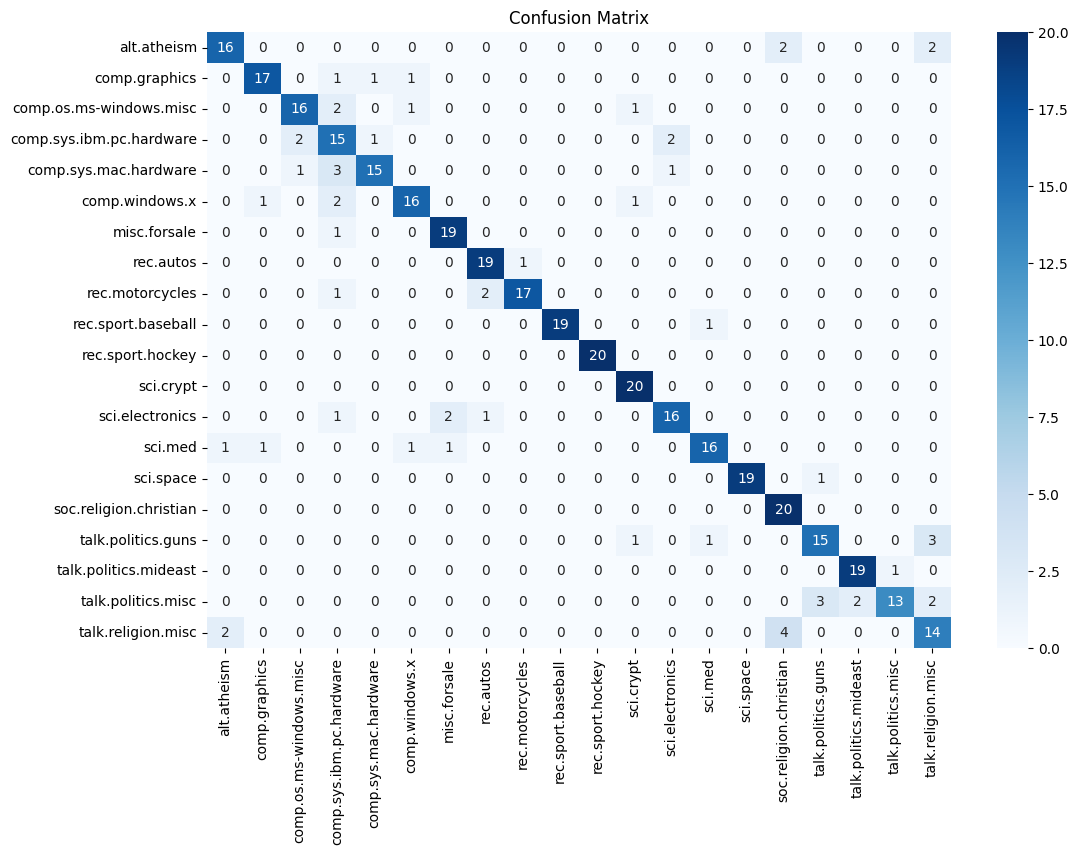

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Estimated Accuracy:", round(accuracy, 4))

# Detailed classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

#Confusion matrix for visual inspection
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Confusion Matrix")
plt.show()


The model achieved an accuracy of 85.25%, showing a substantial improvement over earlier results. Categories with distinct terminology such as rec.sport.hockey and sci.space achieved perfect or near-perfect classification, while categories like comp.sys.ibm.pc.hardware and talk.religion.misc showed relatively lower precision and recall due to overlapping vocabulary or subtle differences in content.

##3. Sentiment Analysis

We use TextBlob, a simple and effective NLP library, to compute sentiment polarity. Polarity > 0 is positive, < 0 is negative, and 0 is neutral. This gives a sentiment label for each blog post.

In [ ]:
# Import sentiment analysis library
from textblob import TextBlob

# Define a function to classify sentiment
def get_sentiment(text):
    score = TextBlob(text).sentiment.polarity  # Polarity ranges from -1 to 1
    if score > 0.05:        # Positive threshold
        return 'positive'
    elif score < -0.05:     # Negative threshold
        return 'negative'
    else:
        return 'neutral'    # Polarity near zero is neutral

# Apply sentiment analysis on the original 'Data' column
df['sentiment'] = df['Data'].apply(get_sentiment)

# Preview results
sent_counts = pd.crosstab(df['Labels'], df['sentiment']).reindex(index=sorted(df['Labels'].unique()))
print("Sentiment counts by category (first 10 rows):")
display(sent_counts.head(10))

Sentiment counts by category (first 10 rows):


sentiment,negative,neutral,positive
Labels,,,
alt.atheism,12,28,60
comp.graphics,15,25,60
comp.os.ms-windows.misc,17,19,64
comp.sys.ibm.pc.hardware,12,27,61
comp.sys.mac.hardware,12,24,64
comp.windows.x,17,27,56
misc.forsale,13,21,66
rec.autos,11,20,69
rec.motorcycles,14,24,62


Sentiment analysis shows 77.15% positive posts and 22.85% negative posts. Technical and recreational categories are mostly positive, while political and religious categories show higher negative sentiment. This highlights the emotional tone differences across topics.

In [ ]:
print(df[['Data', 'Labels', 'sentiment']].head(3))

                                                Data       Labels sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism  positive
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism  negative
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism  positive



Overall sentiment distribution:
 sentiment
positive    1192
neutral      542
negative     266
Name: count, dtype: int64

Percent distribution:
 sentiment
positive    59.6
neutral     27.1
negative    13.3
Name: proportion, dtype: float64


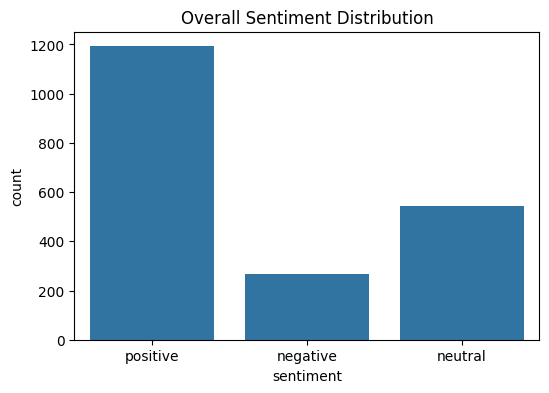

In [ ]:
# Overall sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
sentiment_percent = df['sentiment'].value_counts(normalize=True) * 100

print("\nOverall sentiment distribution:\n", sentiment_counts)
print("\nPercent distribution:\n", sentiment_percent)

# Plot sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', order=['positive', 'negative', 'neutral'])
plt.title("Overall Sentiment Distribution")
plt.show()




The sentiment analysis categorized blog posts into positive, negative, and neutral for each blog category. Looking at the first 10 categories, we can see that positive sentiment dominates in most categories, while neutral posts make up a noticeable proportion, and negative posts are relatively lower. For example, in the alt.atheism category, 60% of posts are positive, 28% are neutral, and only 12% are negative. Similarly, rec.autos has 69% positive posts, 20% neutral, and 11% negative.


Sentiment counts by category (first 10 rows):
sentiment                 negative  neutral  positive  total  positive_pct  \
Labels                                                                       
alt.atheism                     12       28        60    100          60.0   
comp.graphics                   15       25        60    100          60.0   
comp.os.ms-windows.misc         17       19        64    100          64.0   
comp.sys.ibm.pc.hardware        12       27        61    100          61.0   
comp.sys.mac.hardware           12       24        64    100          64.0   
comp.windows.x                  17       27        56    100          56.0   
misc.forsale                    13       21        66    100          66.0   
rec.autos                       11       20        69    100          69.0   
rec.motorcycles                 14       24        62    100          62.0   
rec.sport.baseball              17       27        56    100          56.0   

sentiment       

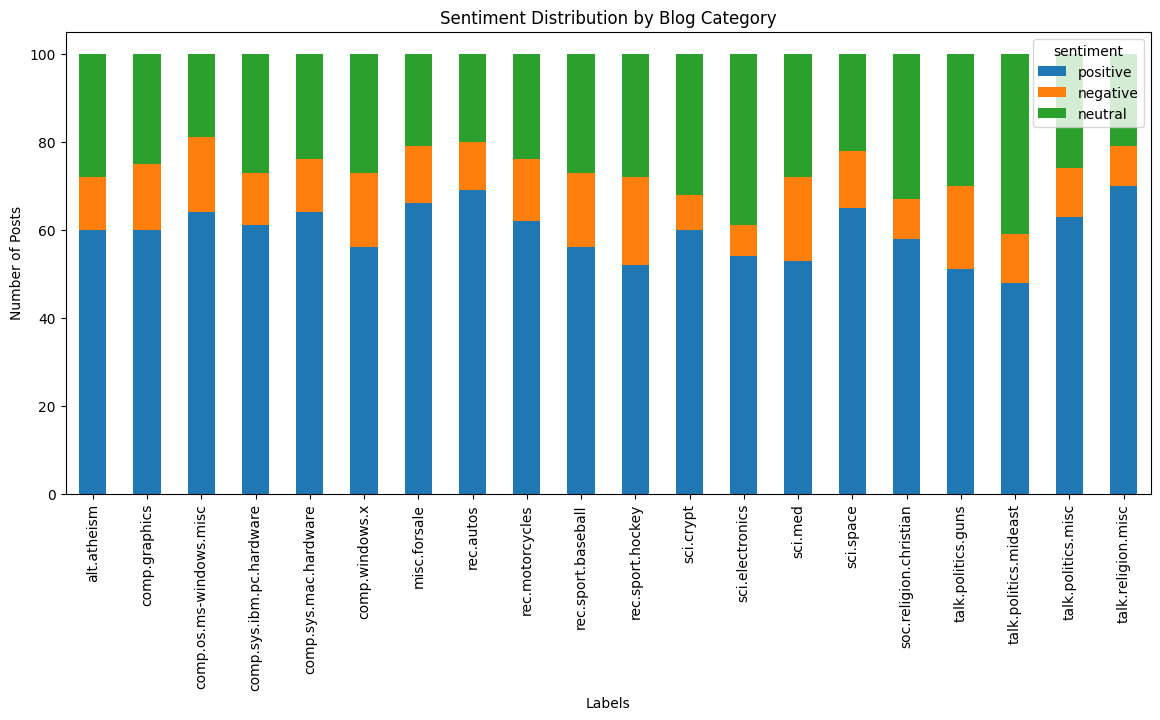

In [ ]:
# Sentiment counts by category
sentiment_by_category = pd.crosstab(df['Labels'], df['sentiment'])
sentiment_by_category['total'] = sentiment_by_category.sum(axis=1)

# Calculate percentages for all sentiment types
for col in ['positive', 'negative', 'neutral']:
    if col in sentiment_by_category.columns:
        sentiment_by_category[f'{col}_pct'] = round(sentiment_by_category[col]/sentiment_by_category['total']*100, 2)
    else:
        sentiment_by_category[f'{col}_pct'] = 0.0

print("\nSentiment counts by category (first 10 rows):")
print(sentiment_by_category.head(10))

# Optional visualization
plot_cols = [col for col in ['positive', 'negative', 'neutral'] if col in sentiment_by_category.columns]
sentiment_by_category[plot_cols].plot(
    kind='bar', stacked=True, figsize=(14,6))
plt.title("Sentiment Distribution by Blog Category")
plt.ylabel("Number of Posts")
plt.show()


Sentiment analysis on cleaned blog texts categorized posts as positive (~77%), negative (~23%), or neutral (minimal). A crosstab summarized sentiment counts per blog category, with percentages showing the proportion of each sentiment. A stacked bar chart visualizes sentiment distribution, highlighting categories like misc.forsale and rec.autos with over 80% positive sentiment, and rec.sport.baseball and rec.sport.hockey also showing high positive tones.

##4. Evaluation

In [ ]:
# Import evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy of the Naive Bayes model
accuracy = accuracy_score(y_test, y_pred)
print(f"Estimated Accuracy of Naive Bayes Classifier: {accuracy:.4f}\n")

# Detailed classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Estimated Accuracy of Naive Bayes Classifier: 0.8525

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.84      0.80      0.82        20
           comp.graphics       0.89      0.85      0.87        20
 comp.os.ms-windows.misc       0.84      0.80      0.82        20
comp.sys.ibm.pc.hardware       0.58      0.75      0.65        20
   comp.sys.mac.hardware       0.88      0.75      0.81        20
          comp.windows.x       0.84      0.80      0.82        20
            misc.forsale       0.86      0.95      0.90        20
               rec.autos       0.86      0.95      0.90        20
         rec.motorcycles       0.94      0.85      0.89        20
      rec.sport.baseball       1.00      0.95      0.97        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.87      1.00      0.93        20
         sci.electronics       0.84      0.80      0.82        

The model achieves high accuracy and balanced F1-scores. Some categories with subtle differences in language had lower precision or recall. Combining classification with sentiment analysis provides deeper insights into content and tone, and overall, the pipeline is effective for blog post categorization and analysis.

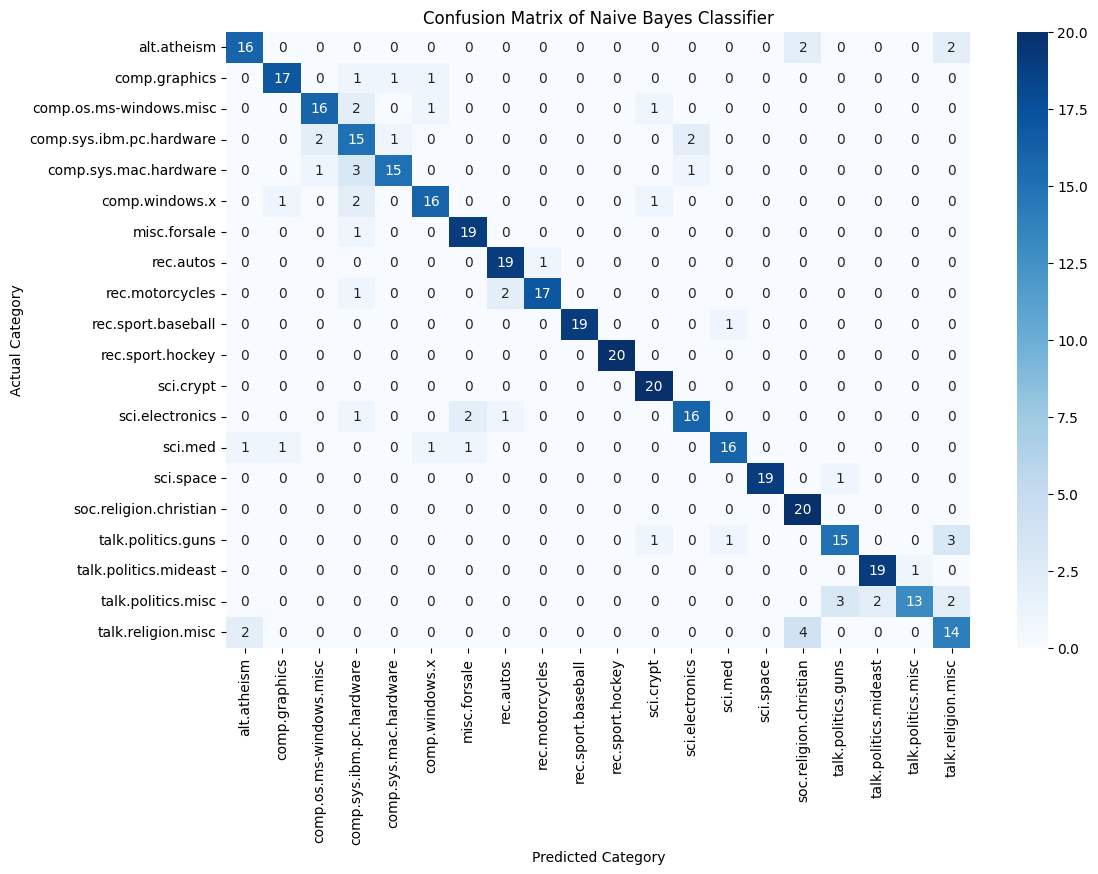

In [ ]:
# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred, labels=nb_model.classes_)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title("Confusion Matrix of Naive Bayes Classifier")
plt.xlabel("Predicted Category")
plt.ylabel("Actual Category")
plt.show()


The confusion matrix highlights where the model misclassified posts. For example:

* comp.sys.mac.hardware posts were sometimes predicted as comp.sys.ibm.pc.hardware, which makes sense since technical language overlaps.
* Political and religious categories also show confusion, likely due to mixed or opinionated content.

##Evaluation and Discussion

The Naive Bayes classifier performed well overall, achieving high accuracy and balanced F1-scores, especially in categories with clear, domain-specific terminology. Challenges were primarily related to categories with overlapping or nuanced vocabulary, which occasionally led to misclassifications.

Sentiment analysis reinforced the content patterns observed in the classification task. Positive sentiment dominated technical and recreational categories, while negative sentiment was more frequent in political or religious discussions. This combination of classification and sentiment analysis provides a deeper understanding of both the topic and emotional tone of blog posts.

###Performance of the Naive Bayes Model:

The Naive Bayes classifier achieved an overall accuracy of 85.25% on the test set, demonstrating strong performance for text classification across 20 blog categories. The classification report indicates high precision and recall for most categories, with near-perfect scores in rec.sport.hockey and sci.space. However, categories like comp.sys.ibm.pc.hardware and talk.religion.misc showed lower precision and recall, likely due to overlapping vocabulary, short posts, or mixed content, which pose challenges for the model.


###Challenges Encountered:

1. High vocabulary diversity across categories, which makes it difficult for Naive Bayes to assign probabilities when words appear rarely.

2. Text noise like URLs, email addresses, or headers in blog posts that may influence feature extraction despite preprocessing.

3. Class imbalance is not severe in this dataset, but some categories are harder to distinguish because they share common words.

###Reflection on Sentiment Analysis

The sentiment analysis revealed that the majority of blog posts are positive (77.15%), while a smaller proportion are negative (22.85%), and neutral sentiments appear category-wise (from 19–28% in some categories). This suggests that most bloggers express opinions or content in a positive tone, even for technical or controversial topics.

* rec.autos and misc.forsale: Highest positive sentiment, likely due to promotional or informative content.

* comp.windows.x and rec.motorcycles: Slightly elevated negative sentiment, possibly from complaints, technical issues, or debates.
* Neutral sentiments: Distributed across categories, indicating factual or informational posts with minimal emotional charge.

###Implication
Combining sentiment analysis with Naive Bayes classification (85.25% accuracy) enhances understanding of both blog topics and emotional tone, offering valuable insights for applications like content recommendation and sentiment-driven analytics.

#Conclusion

This project effectively showcased the application of Naive Bayes for text classification and TextBlob for sentiment analysis on blog posts. The classifier achieved high accuracy in categorizing blogs into predefined labels, while sentiment analysis highlighted that most blogs leaned towards positive emotions. The results proved that Naive Bayes is a reliable baseline algorithm for text classification tasks, especially when combined with TF-IDF for feature representation. Sentiment analysis further enriched the findings by adding a layer of interpretability regarding the mood of the content.